# Figure 1: Denmark Strait freshwater transports

This notebook will reproduce Figure 1 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [10]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fd_trans=xr.open_dataset('../data_out/Denmark_Strait_full_depth_transports.nc')

In [4]:
fd_clim=fd_trans.groupby(fd_trans.time.dt.month).mean('time')
fd_anom=fd_trans.groupby(fd_trans.time.dt.month)-fd_clim

In [5]:
fd_trans

<xarray.Dataset>
Dimensions:        (k: 50, time: 312, i_g: 90, j: 90, tile: 13, i: 90, j_g: 90,
                    Sref: 3)
Coordinates: (12/13)
    Z              (k) float32 ...
  * k              (k) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    drF            (k) float32 ...
    PHrefC         (k) float32 ...
  * time           (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T1...
    timestep       (time) int64 ...
    ...             ...
  * j              (j) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * tile           (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i              (i) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g            (j_g) int64 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * Sref           (Sref) float64 35.0 34.8 34.9
    section        object ...
Data variables:
    heat_trsp_z    (time, k) float64 ...
    heat_trsp      (time) float64 ...
    maskW          (tile, j, i_g) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    maskS          (tile, j_g, i) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    vol_trsp_z     (time, k) float64 ...
    vol_trsp       (time) float64 ...
    fw_trsp_adv_z  (Sref, time, k) float64 ...
    fw_trsp_adv    (Sref, time) float64 ...
    fw_trsp_dif_z  (Sref, time, k) float64 ...
    fw_trsp_dif    (Sref, time) float64 ...
    fw_trsp        (Sref, time) float64 -0.09608 -0.1165 ... -0.1159 -0.09413
Attributes:
    contact:     emmomp@bas.ac.uk
    references:  ECCOv4r4 data from Boland et al (in prep)
    date:        Created on 15/10/2024
    notes:       Data produced by analysis of the ECCOv4r4 state estimate, se...

In [6]:
tslice=slice('1992-01-01','2016-01-01')
fd_mean=fd_trans.mean(dim='time')
fd_sd=fd_trans.std(dim='time')

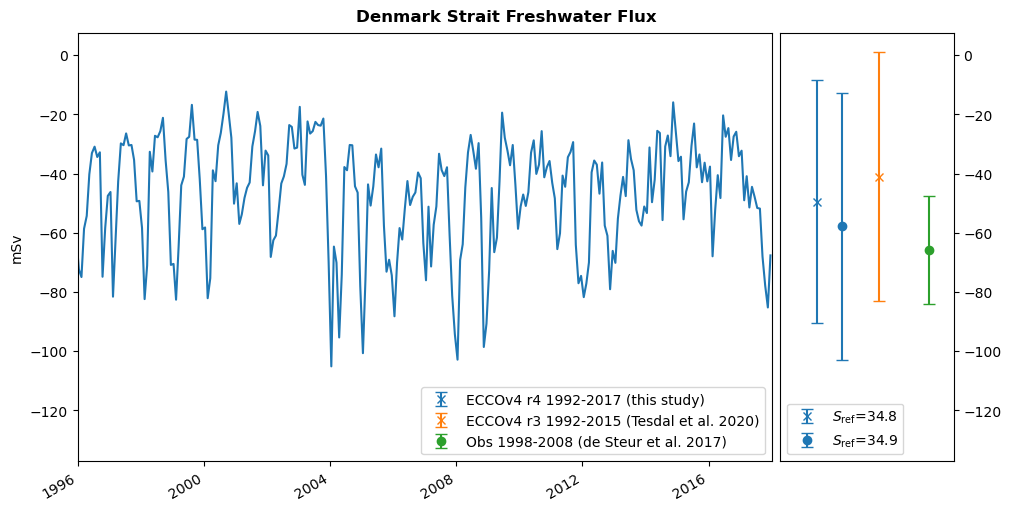

In [19]:
obs=[-65.9,18.3] # de Steur 2017
ecco_r3=[-41,42] # Tesdel et al. 2020
var='fw_trsp_adv'

fig, axs = plt.subplot_mosaic('''
                              AAAAB
                              ''',
                              layout='constrained',sharey=True,figsize=[10,5])
ax=axs['A']
(1e3*fd_trans['fw_trsp_adv']).sel(Sref=34.8).plot(x='time',ax=ax)
ax.set_xlim([np.datetime64('1996-01-01'),np.datetime64('2018-01-01')])
ax.set_ylabel('mSv')
ax.set_xlabel('')
ax.set_title('')

ax=axs['B']
p1a=ax.errorbar(-0.25,(fd_mean[var].sel(Sref=34.8)*1e3),yerr=2e3*fd_sd[var].sel(Sref=34.8),marker='x',ls='',capsize=4)
p1b=ax.errorbar(-0.15,(fd_mean[var].sel(Sref=34.9)*1e3),yerr=2e3*fd_sd[var].sel(Sref=34.9),marker='o',ls='',capsize=4,color=p1a[0].get_color())
p2=ax.errorbar(0,ecco_r3[0],yerr=ecco_r3[1],marker='x',ls='',capsize=4)
p3=ax.errorbar(0.2,obs[0],yerr=obs[1],marker='o',ls='',capsize=4)
ax.set_xlim([-0.4,0.3])
plt.xticks(None)
plt.xticks([], [])
ax.yaxis.tick_right()
ax.yaxis.set_tick_params(labelright=True)

plt.suptitle('Denmark Strait Freshwater Flux',fontweight='bold',fontsize=12)
axs['A'].legend([p1a,p2,p3],['ECCOv4 r4 1992-2017 (this study)','ECCOv4 r3 1992-2015 (Tesdal et al. 2020)','Obs 1998-2008 (de Steur et al. 2017)'],loc='lower right')
axs['B'].legend([p1a,p1b],['$S_{\mathrm{ref}}$=34.8','$S_{\mathrm{ref}}$=34.9'])
plt.savefig('../plots/fig1_DS_fwtransports.pdf')